In [2]:
#Carga de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carga de datos

In [3]:
train =pd.read_csv('../../grupo-bimbo-inventory-demand/train.csv')
test = pd.read_csv('../../grupo-bimbo-inventory-demand/test.csv')

In [4]:
train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3


## EDA

### Información de Test y Train

In [5]:
#Forma de los datos
print('tamaño de entrenamiento: '+ str(train.shape))
print('tamaño de test' + str(test.shape))

tamaño de entrenamiento: (74180464, 11)
tamaño de test(6999251, 7)


In [6]:
#Nombre de las columnas
print('Columnas en train: '+ str(train.columns.tolist()))
print('Columnas en test: '+ str(test.columns.tolist()))

Columnas en train: ['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID', 'Venta_uni_hoy', 'Venta_hoy', 'Dev_uni_proxima', 'Dev_proxima', 'Demanda_uni_equil']
Columnas en test: ['id', 'Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID']


In [7]:
print(train.describe())

             Semana    Agencia_ID      Canal_ID      Ruta_SAK    Cliente_ID  \
count  7.418046e+07  7.418046e+07  7.418046e+07  7.418046e+07  7.418046e+07   
mean   5.950021e+00  2.536509e+03  1.383181e+00  2.114855e+03  1.802119e+06   
std    2.013175e+00  4.075124e+03  1.463266e+00  1.487744e+03  2.349577e+06   
min    3.000000e+00  1.110000e+03  1.000000e+00  1.000000e+00  2.600000e+01   
25%    4.000000e+00  1.312000e+03  1.000000e+00  1.161000e+03  3.567670e+05   
50%    6.000000e+00  1.613000e+03  1.000000e+00  1.286000e+03  1.193385e+06   
75%    8.000000e+00  2.036000e+03  1.000000e+00  2.802000e+03  2.371091e+06   
max    9.000000e+00  2.575900e+04  1.100000e+01  9.991000e+03  2.015152e+09   

        Producto_ID  Venta_uni_hoy     Venta_hoy  Dev_uni_proxima  \
count  7.418046e+07   7.418046e+07  7.418046e+07     7.418046e+07   
mean   2.084081e+04   7.310163e+00  6.854452e+01     1.302577e-01   
std    1.866392e+04   2.196734e+01  3.389795e+02     2.932320e+01   
min    4.100

### Analisis de inputs

In [8]:
print('Las semanas para las cuales hay datos: ' + str(train['Semana'].unique().tolist()))
print('Numero de agencias distintas: '+ str(len(train['Agencia_ID'].unique())))
print('Numero de canales distintos: '+ str(train['Canal_ID'].unique().tolist()))
print('Numero de rutas distintas: '+ str(len(train['Ruta_SAK'].unique())))
print('Numero de clientes distintos: '+ str(len(train['Cliente_ID'].unique())))
print('Numero de productos distintos: '+ str(len(train['Producto_ID'].unique())))



Las semanas para las cuales hay datos: [3, 4, 5, 6, 7, 8, 9]
Numero de agencias distintas: 552
Numero de canales distintos: [7, 8, 11, 1, 4, 2, 6, 5, 9]
Numero de rutas distintas: 3603
Numero de clientes distintos: 880604
Numero de productos distintos: 1799


### Analisis de varaible a predecir
La variable a predecir es Dev_uni_equil 

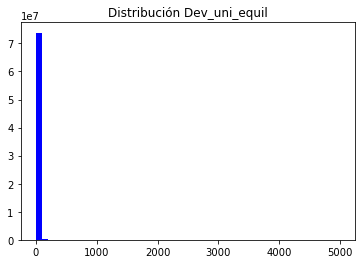

In [11]:
#Existen outliers
plt.hist((train['Demanda_uni_equil']), bins=50, color='blue')
plt.title('Distribución Dev_uni_equil')
plt.show()

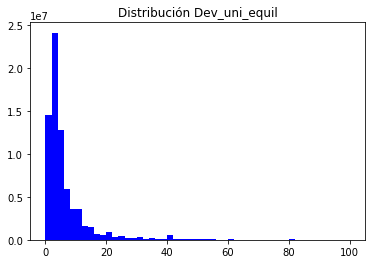

In [13]:
#La misma gráfica, pero filtrada
train_50 = train[train['Demanda_uni_equil']<=100]
plt.hist((train_50['Demanda_uni_equil']), bins=50, color='blue')
plt.title('Distribución Dev_uni_equil')
plt.show()